# Homework 10: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [4]:
sample_size = 100
beta0 = 5
beta1 = 0.5
beta2 = 2
beta3 = 4
x_mu = 1.5
x_sd = 0.3
e_mu = 0.5
e_sd = 0.25

# Y = beta0 + beta1*x + beta2*x^2 + beta3*x^3 + e

set.seed(675) 

simulate_data <- function(sample_size, beta0, beta1, beta2, beta3,x_mu, x_sd, e_mu, e_sd) {
      x = rnorm(sample_size, x_mu, x_sd)
      e = rnorm(sample_size, e_mu, e_sd)
      y = beta0 + beta1*x + beta2*x^2 + beta3*x^3 + e
      return(data.frame(y=y, x=x, x2=x^2, x3=x^3, x4=x^4, x5=x^5, x6=x^6, x7=x^7, x8=x^8 ,x9=x^9, x10=x^10, e=e))
}

data <- simulate_data(sample_size, beta0, beta1, beta2, beta3,x_mu, x_sd, e_mu, e_sd)
head(data)

,y,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,e
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28.48709,1.608310,2.586660,4.160151,6.690811,10.760897,17.306856,27.834785,44.766957,71.999134,115.796909,0.8690146
2,13.94220,1.118360,1.250729,1.398765,1.564323,1.749476,1.956544,2.188121,2.447107,2.736746,3.060667,0.2865028
3,18.83682,1.326587,1.759834,2.334574,3.097016,4.108463,5.450236,7.230214,9.591511,12.723978,16.879469,0.3155650
4,32.61354,1.717545,2.949961,5.066691,8.702270,14.946542,25.671359,44.091716,75.729509,130.068845,223.399103,0.5880773
5,22.54731,1.437199,2.065541,2.968594,4.266460,6.131752,8.812547,12.665384,18.202678,26.160871,37.598378,0.8232560
6,21.84918,1.422200,2.022653,2.876617,4.091125,5.818398,8.274926,11.768599,16.737302,23.803792,33.853754,0.5863017


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

For this you will need to install and load the _leaps_ library.

In [6]:
library(leaps)
library(tidyverse)

regfit.full = regsubsets(y~., select(data, c(y,x,x2,x3,x4,x5,x6,x7,x8,x9,x10)))
reg.summary = summary(regfit.full) # Asterisks indicate that a field is included in the model
reg.summary

Subset selection object
Call: regsubsets.formula(y ~ ., select(data, c(y, x, x2, x3, x4, x5, 
    x6, x7, x8, x9, x10)))
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 ) " " " " "*" " " " " " " " " " " " " " "
2  ( 1 ) "*" " " "*" " " " " " " " " " " " " " "
3  ( 1 ) " " "*" "*" " " " " " " " " " " " " "*"
4  ( 1 ) " " "*" " " " " " " " " "*" " " "*" "*"
5  ( 1 ) "*" "*" " " " " " " " " " " "*" "*" "*"
6  ( 1 ) "*" " " " " " " " " "*" "*" "*" "*" "*"
7  ( 1 ) "*" "*" "*" "*" "*" "*" "*" " " " " " "
8  ( 1 ) " " " " "*" "*" "*" "*" "*" "*" "*" "*"

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

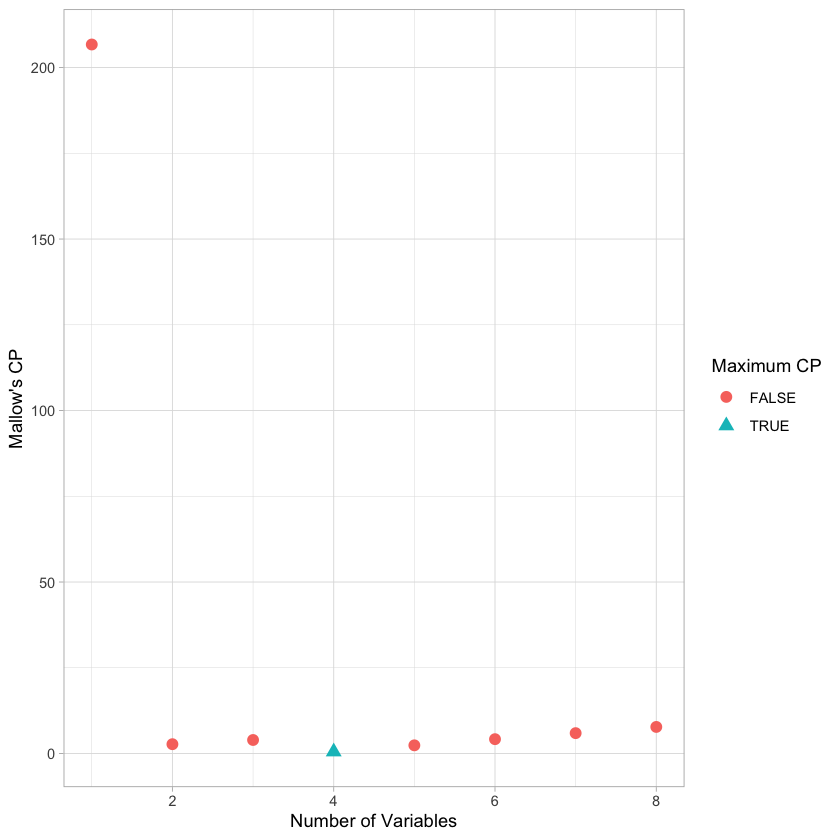

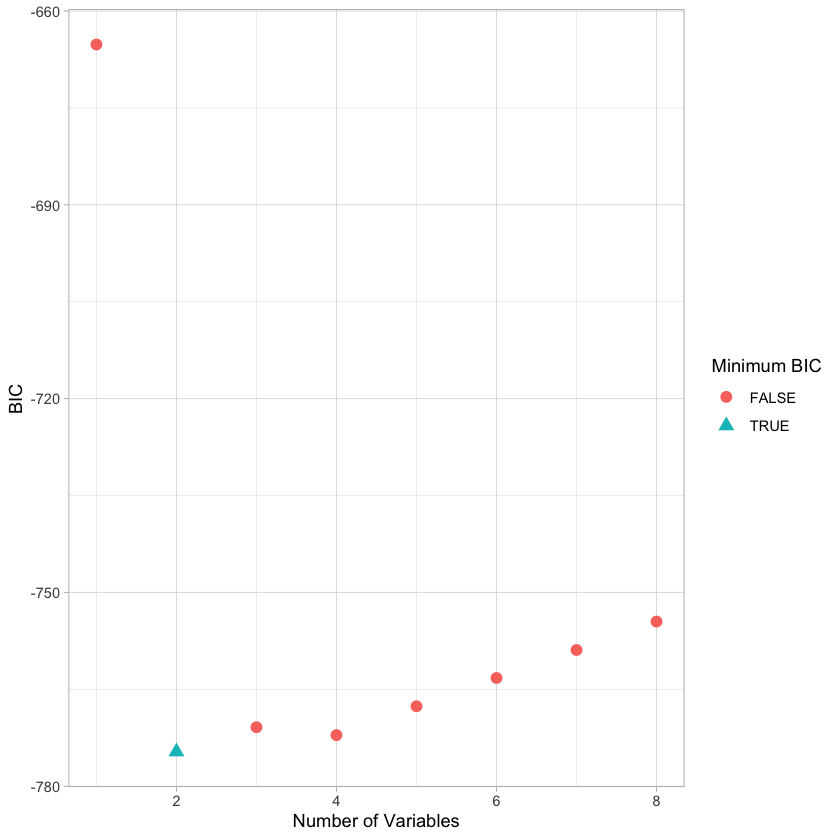

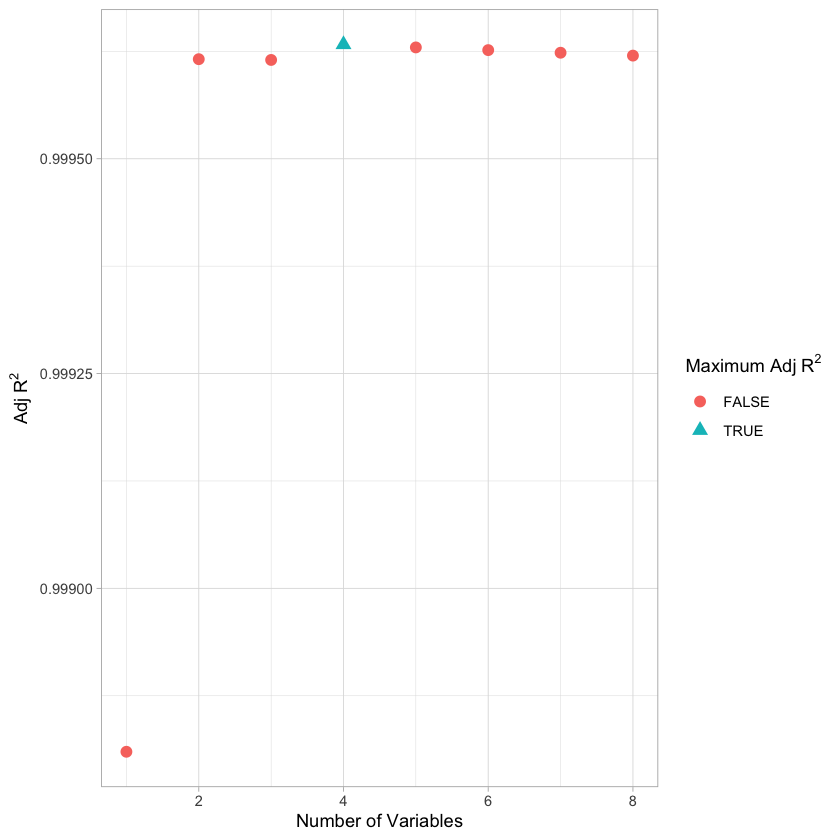

In [7]:
numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 10. 
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.


# mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp, shape=mincp, col=mincp)) + 
     geom_point(size=3) + theme_light() + 
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

# BIC
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

# adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)




> *Two of the three model comparison methods (adjusted R2 and Marrow's CP) suggest that the model with 4 variables is the best and most parsamoneous model. The BIC, however, differs. It suggests that the best/most parsamoneous model is the one with 2 variables. In this case, we will go with the majority opinion and select the model with 4 variables. The be model is thus: Y = (b_2)(X^2) + (b_7)(X^7) + (b_9)(X^9) + (b_10)(X^10)*

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

Subset selection object
Call: regsubsets.formula(y ~ ., select(data, c(y, x, x2, x3, x4, x5, 
    x6, x7, x8, x9, x10)), method = "forward")
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 ) " " " " "*" " " " " " " " " " " " " " "
2  ( 1 ) "*" " " "*" " " " " " " " " " " " " " "
3  ( 1 ) "*" " " "*" "*" " " " " " " " " " " " "
4  ( 1 ) "*" " " "*" "*" " " " " " " " " " " "*"
5  ( 1 ) "*" " " "*" "*" " " " " " " " " "*" "*"
6  ( 1 ) "*" " " "*" "*" " " " " " " "*" "*" "*"
7  ( 1 ) "*" "*" "*" "*" " " " " " " "*" "*" "*"
8  ( 1 ) "*" "*" "*" "*" " " " " "*" "*" "*" "*"

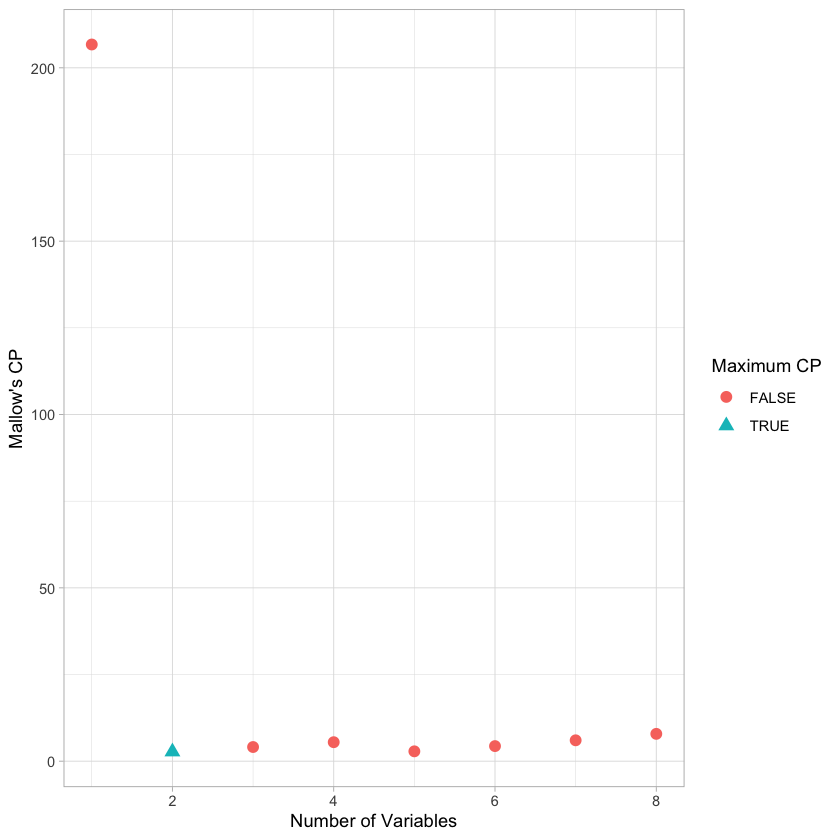

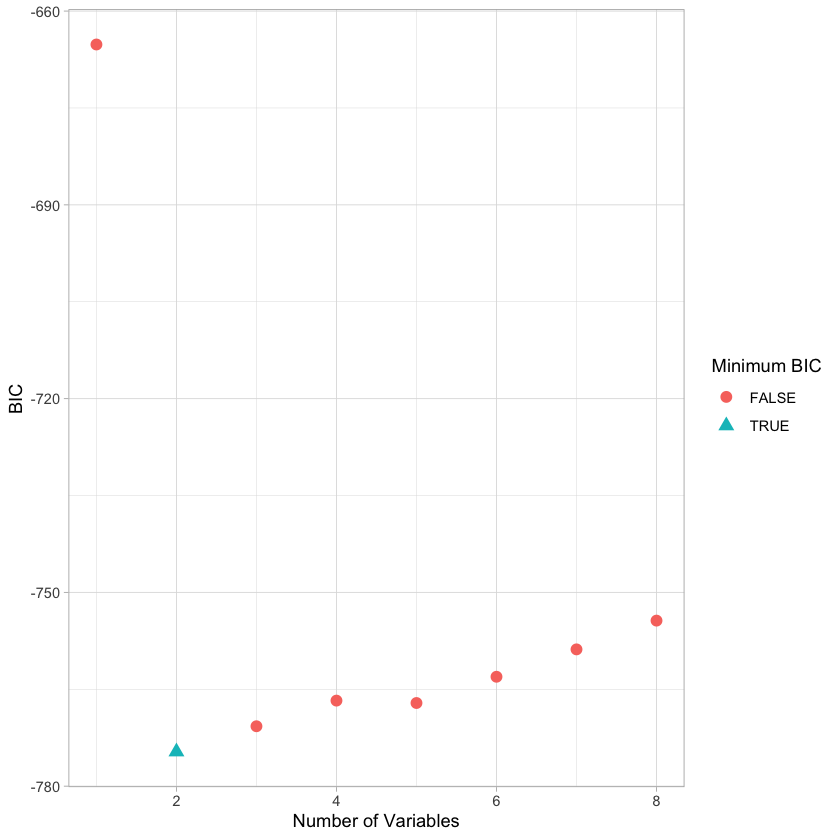

,(Intercept),x,x2,x3,x4,x5,x6,x7,x8,x9,x10
1,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
5,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE
6,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
7,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
8,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE


(Intercept)           x          x3 
   3.715404    3.806264    4.396272

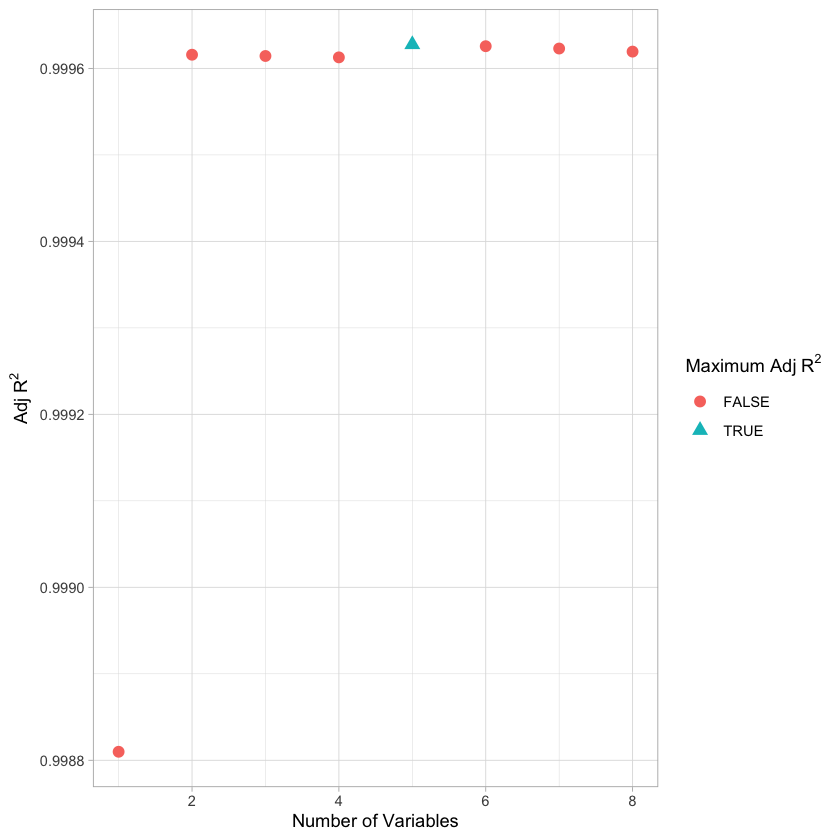

In [8]:
regfit.fwd = regsubsets(y~., select(data, c(y,x,x2,x3,x4,x5,x6,x7,x8,x9,x10)),method="forward")
reg.summary.fwd = summary(regfit.fwd) # Asterisks indicate that a field is included in the model
reg.summary.fwd

# mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary.fwd$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary.fwd$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp, shape=mincp, col=mincp)) + 
     geom_point(size=3) + theme_light() + 
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

# BIC
bic.df <- data.frame(numvar = numvar,bic <- reg.summary.fwd$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary.fwd$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

# adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary.fwd$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary.fwd$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)


# Coefficients of best model:
reg.summary.fwd$which
coef(lm(y ~ x + x3, data = data))

In [34]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

ERROR: Error in parse(text = x, srcfile = src): attempt to use zero-length variable name


b) Backwards stepwise selection:

Subset selection object
Call: regsubsets.formula(y ~ ., select(data, c(y, x, x2, x3, x4, x5, 
    x6, x7, x8, x9, x10)), method = "backward")
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: backward
         x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 ) " " " " " " "*" " " " " " " " " " " " "
2  ( 1 ) " " " " " " "*" "*" " " " " " " " " " "
3  ( 1 ) " " " " " " "*" "*" "*" " " " " " " " "
4  ( 1 ) " " " " " " "*" "*" "*" "*" " " " " " "
5  ( 1 ) " " " " " " "*" "*" "*" "*" "*" " " " "
6  ( 1 ) " " "*" " " "*" "*" "*" "*" "*" " " " "
7  ( 1 ) " " "*" "*" "*" "*" "*" "*" "*" " " " "
8  ( 1 ) " " "*" "*" "*" "*" "*" "*" "*" "*" " "

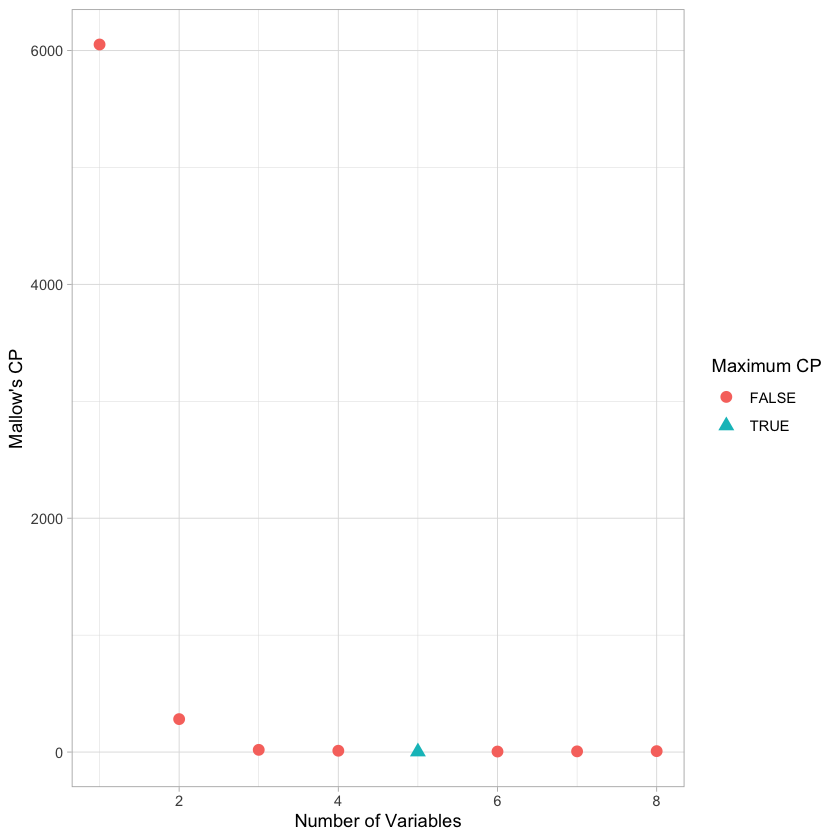

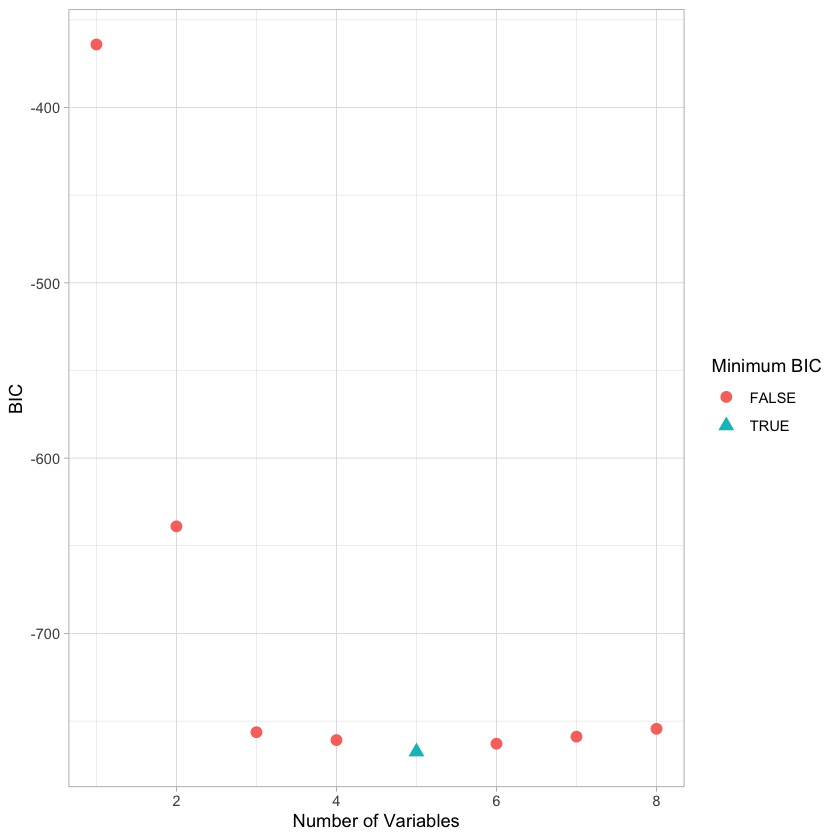

,(Intercept),x,x2,x3,x4,x5,x6,x7,x8,x9,x10
1,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
4,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE
5,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
6,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
7,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
8,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE


(Intercept)          x4          x5          x6          x7          x8 
   5.523350   30.230688  -46.594777   31.708433  -10.179805    1.257939

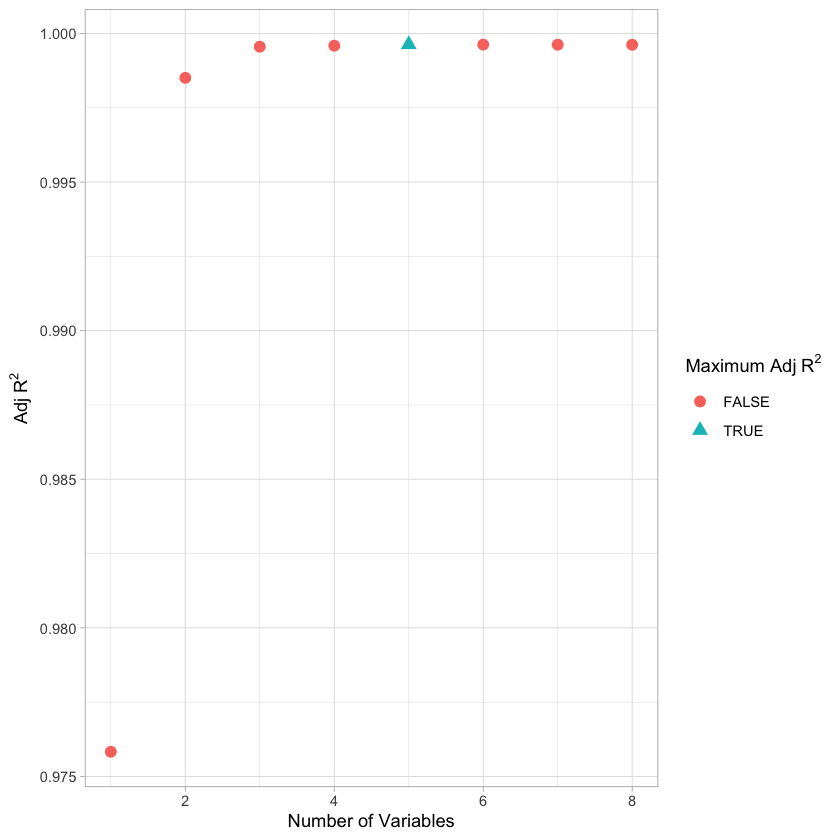

In [9]:
regfit.bkwd = regsubsets(y~., select(data, c(y,x,x2,x3,x4,x5,x6,x7,x8,x9,x10)),method="backward")
reg.summary.bkwd = summary(regfit.bkwd) # Asterisks indicate that a field is included in the model
reg.summary.bkwd

# mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary.bkwd$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary.bkwd$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp, shape=mincp, col=mincp)) + 
     geom_point(size=3) + theme_light() + 
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

# BIC
bic.df <- data.frame(numvar = numvar,bic <- reg.summary.bkwd$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary.bkwd$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

# adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary.bkwd$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary.bkwd$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)


# Coefficients of best model (model 5):
reg.summary.bkwd$which
coef(lm(y ~ x4 + x5 + x6 + x7 + x8, data = data))

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> *Use of the exhaustive method in question 1 resulted in support for the model with 4 predictors, with the supported having predictors x^2 + x^7 + x^9 + x^10. This initial results diverged from those uncovered in both parts A and B of question 2. Using the "forward" technique in part A, strongest support was found for a two-predictor model solution, where x + x^3 predicted Y. Contary to this, using the "backward" technique in part B, strongest support was found for a five-predictor model solution, were x^4 + x^5 + x^6 + x^7 + x^8 predicted Y.*

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [7]:
library("generics")
library("caret")

sample_size = 1000

set.seed(123456)

dataq3 <- data.frame(replicate(20, rnorm(n = 1000))) #replicate() repeats an expression a specific number of times
dataq3 %>% reduce(function(y, x) y + ifelse(runif(1) < 0.5, rnorm(1, mean = 5, sd = 1), 0)*x + rnorm(1000)) -> dataq3$Y                 
  
# splitting data into test and training
Train <- createDataPartition(dataq3$Y, p = 0.1, list = FALSE) #creates series of test/training partitions                  
                  
x_train <- dataq3[Train, -21]
y_train <- dataq3[Train, 21]
x_test <- dataq3[-Train, -21]
y_test <- dataq3[-Train, 21]      
                  



b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

Subset selection object
20 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
X11     FALSE      FALSE
X12     FALSE      FALSE
X13     FALSE      FALSE
X14     FALSE      FALSE
X15     FALSE      FALSE
X16     FALSE      FALSE
X17     FALSE      FALSE
X18     FALSE      FALSE
X19     FALSE      FALSE
X20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10 X11 X12 X13 X14 X15 X16 X17
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " " " " " " " " " " " " " " " "
2  ( 1 )  " " " " "*" " " " " "*" " " " " " " " " " " " " " " " " " " " " " "
3  ( 1 )  " " " " "*" " " " " "*" " " " " " " " " " " " " " " " " " " "*" " "
4  ( 1 )  " " " " "*" " " " " "*" "*" " " " "

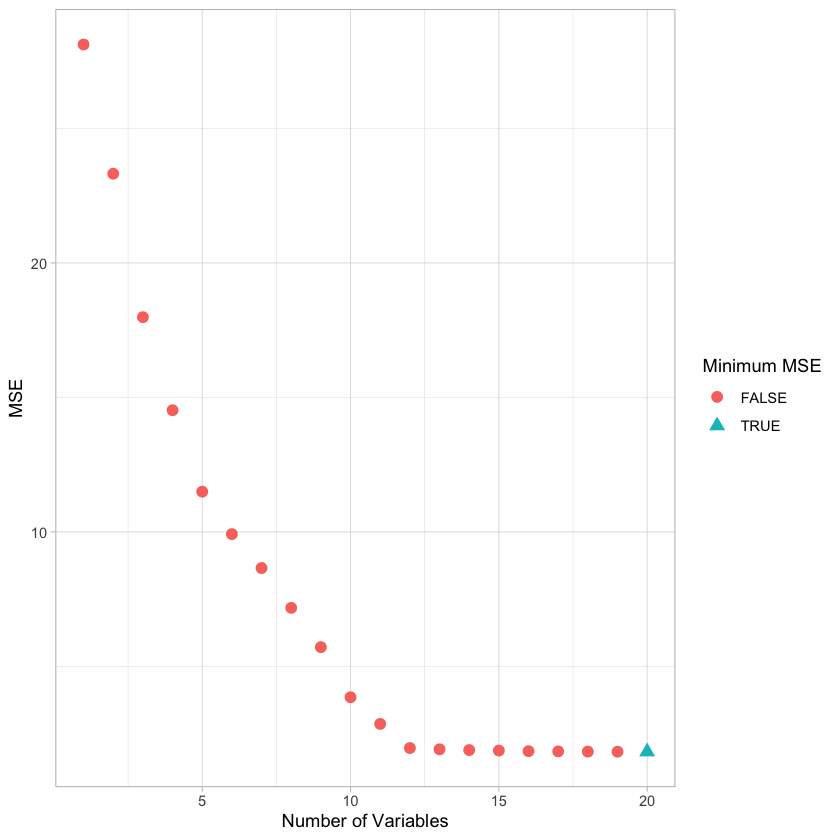

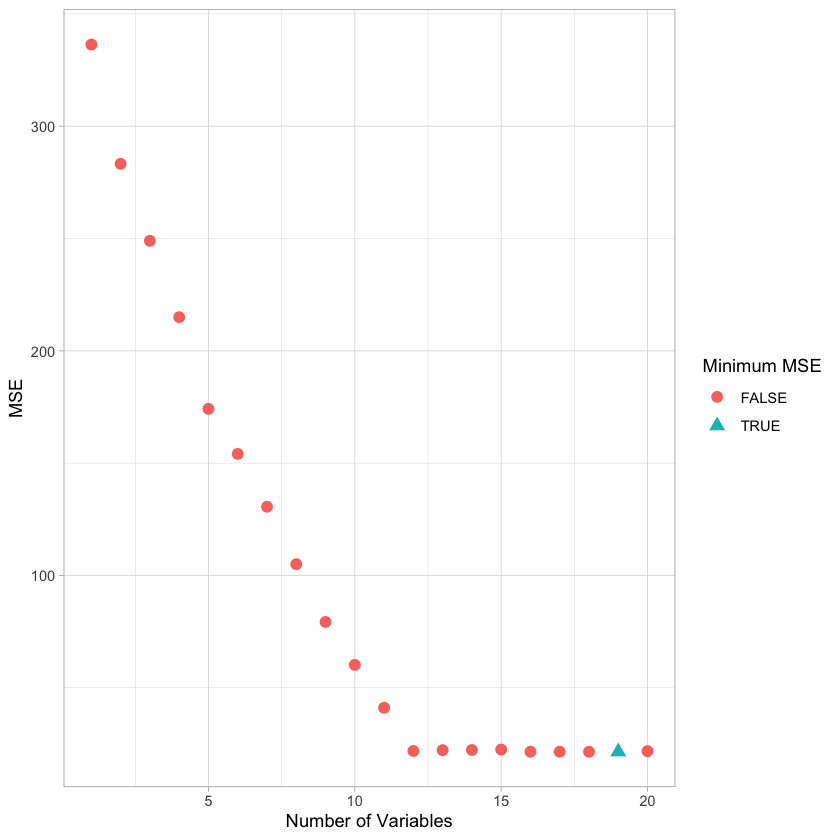

In [20]:
library(leaps)

#best subset selection on training set
subset.q3 = regsubsets(x=x_train, y=y_train, nbest=1, nvmax=20)
subset.q3.summary = summary(subset.q3) 
subset.q3.summary


#plotting Training set
numvar = 1:length(subset.q3.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 10. 
allfalse = rep(FALSE,length(subset.q3.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.
MSE = (subset.q3.summary$rss/900) #RSS/sample size = MSE

MSE.df <- data.frame(numvar = numvar, MSE = MSE, minMSE <- allfalse)
MSE.df$minMSE[which.min(MSE)] <- TRUE

ggplot(MSE.df,aes(x=numvar,y=MSE, shape=minMSE, col=minMSE)) + 
     geom_point(size=3) + theme_light() + 
     labs(x = "Number of Variables", y = "MSE", color="Minimum MSE", shape="Minimum MSE")

#plotting Test set
test_errors = rep(NA,19)
test.mat <- model.matrix(Y ~ ., data = dataq3[-Train,])
for (i in 1:20){
        coefs = coef(subset.q3, id=i)
        pred = test.mat[,names(coefs)]%*%coefs
        test_errors[i] = mean((y_test-pred)^2)
} 

MSE = test_errors

MSE.df2 <- data.frame(numvar = numvar, MSE = MSE, minMSE <- allfalse)
MSE.df2$minMSE[which.min(MSE)] <- TRUE

ggplot(MSE.df2,aes(x=numvar,y=MSE, shape=minMSE, col=minMSE)) + 
     geom_point(size=3) + theme_light() + 
     labs(x = "Number of Variables", y = "MSE", color="Minimum MSE", shape="Minimum MSE")



c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [22]:
which.min(test_errors)

[1] 19

> *The best model according to the test MSE is the model with 19 parameters. This model has the lowest MSE value.*

> *This diverges slightly from expectations given the way the actual data was simulated, which had 20 predictors with coefficients calculated such that 50% of the coefficient will be 0. We do see a dramatic decrease in the rate of MSE minimization around 12 coefficients, however.*
> 

**DUE:** 5pm EST, April 15th, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Delainey Wescott*

Amy & Tim,

I was very uncertain on how to do part 3a of this homework as well as the second part of part 3b (the testing modeling). Neither stimulating data during features and sample sizes NOR splitting data into test and training were covered in the course tutorials (at least that I could find). When my classmates and I searched the web on how to find these answers, we came across a solution to this exact problem: https://renenyffenegger.ch/notes/development/languages/R/functions/runif

I did as much of question 3 as I could on my own. That said, there are parts of question 3 in my homework submission that were modeled after the code above. Even when this was used, I spent time googling and working to understand the guiding code. Could part 3 of this homework receive a bit more attention when we review it in class?

Thanks,
Kristina